# Imports

In [1]:
#Run in pathml_jupyter.sif or similar image with opencv, scipy, sklearn, matplotlib etc
#or pointpats_jupyter.sif
# apptainer shell -B  ~/HCC-CBS-028-Pfizer-TBruno:/mnt --nv ~/odrive/data_transfer/pathml_jupyter.simg
import os
import sys
import pdb
import time
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
hpc = True
work_desktop = False
work_linux = True
singularity = True
prj = "HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra"
if not hpc:
    if work_desktop:
        if singularity:
            base = Path('/mnt/data')
            scripts = Path('/mnt/scripts')
        else:
            if work_linux == True:
                base = Path('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/%s' % proj)
            else:
                base = Path(r'D:\OneDrive - University of Pittsburgh\Internal_Project_Data_2\%s' % proj)
            scripts = base.joinpath('scripts')
    else: #Laptop
        base = Path('/home/brian/data/odrive/Internal_Project_Data_2/%s' % proj)
        scripts = base.joinpath('scripts')
else:
    if singularity:
        base = Path('/mnt') 
    else:
        base = Path('/ix/rbao/Projects/%s' % prj)
    scripts = base.joinpath('scripts')
                        
#Custom helper functions:
sys.path.append(str(scripts.joinpath('inform_vectra_tools')))
from inform_vectra_tools import vecutils

%load_ext autoreload
%autoreload 2

results = base.joinpath('results')
sampleinfo = base.joinpath('sampleinfo')
# info = pd.read_excel(sampleinfo.joinpath('18_139_clinical_information.xlsx'),header=1)
data = base.joinpath('data','inform_data_exports')
# data =  data.joinpath('inform')
print(data.exists())


all_fns = [str(x) for x in data.rglob('*cell_seg_data.txt')]
print('vectra outputs',len(all_fns))

c_tma = 0
c_wts = 0
for fn in all_fns:
    if 'TMA' in fn:
        c_tma = c_tma + 1
    else:
        # print('WTS file:', fn)
        c_wts = c_wts + 1
print('TMA:',c_tma, 'WTS:', c_wts)

#Load in an example
txt = [data.joinpath(all_fns[0])]
print(txt)
df = pd.read_csv(txt[0], sep='\t')
keep_cols = vecutils.get_min_columns(df)
# print(keep_cols)



True
vectra outputs 2029
TMA: 0 WTS: 2029
[PosixPath('/mnt/data/inform_data_exports/RACUEV_Scan1_[7385,38436]_cell_seg_data.txt')]


In [2]:
len(all_fns)

2029

# Save sample list

In [14]:
all_fns = [x for x in data.rglob('*cell_seg_data.txt')]

In [10]:
sampleinfo = base.joinpath('sampleinfo')

In [20]:
temp = str(abs_base.joinpath('data','inform_data_exports')) + '/' + df.file.values
temp[1]

'/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra/data/inform_data_exports/RACUWG_Scan1_[14325,51531]_cell_seg_data.txt'

In [22]:
df = pd.DataFrame([])
df.loc[:,'task'] = np.array([i for i in range(1,2030)])
df.loc[:,'file'] = [x.parts[-1] for x in all_fns]
abs_base = Path('/ix/rbao/Projects/%s' % prj)
df.loc[:,'fnpn'] =   str(abs_base.joinpath('data','inform_data_exports')) + '/' + df.file.values 
df.head()

,task,file,fnpn
0,1,"RACUEV_Scan1_[7385,38436]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
1,2,"RACUWG_Scan1_[14325,51531]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
2,3,"RACVIR_Scan1_[17683,50985]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
3,4,"RACUGF_Scan1_[14710,40334]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
4,5,"RACVHW_Scan1_[12187,46446]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...


In [24]:
df.fnpn[1]

'/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra/data/inform_data_exports/RACUWG_Scan1_[14325,51531]_cell_seg_data.txt'

In [25]:
df.to_csv(sampleinfo.joinpath('file_list.tsv'),
          sep ='\t',
          index = False)

In [13]:
df = pd.read_csv(sampleinfo.joinpath('file_list.tsv'),
                 sep = '\t')
df.head()

,task,file,loc
0,0,"RACUEV_Scan1_[7385,38436]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
1,1,"RACUWG_Scan1_[14325,51531]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
2,2,"RACVIR_Scan1_[17683,50985]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
3,3,"RACUGF_Scan1_[14710,40334]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...
4,4,"RACVHW_Scan1_[12187,46446]_cell_seg_data.txt",/ix/rbao/Projects/HCC-CBS-173-Hillman-BFerris-...


## No clinical info

# Generate merged cell output df by combining vectra data into one file

In [3]:
len([x for x in data.rglob('*cell_seg_data.txt')])

2029

In [5]:
start = time.time()
merge = pd.DataFrame([])
n_tma = 0
fns = [x for x in data.rglob('*cell_seg_data.txt')]
for fn in tqdm(fns):
    core = vecutils.seg_fn_to_unique_tma_code([fn.parts[-1]],
                                            method = 0)
    df = pd.read_csv(fn,sep='\t')
    keep_cols = vecutils.get_min_columns(df)
    
    df = df.loc[:,keep_cols]
    df.loc[:,'tissue_id'] = core[0]
    if 'TMA' in fn.parts[-1]:
        df.loc[:,'sample_type'] = 'TMA'
    else:
        df.loc[:,'sample_type'] = 'WTS'
  
    merge = pd.concat((merge,df),axis=0)
    
if any(df.loc[:,'sample_type']=='TMA'): 
    for i in range(1,n_tma):
        idx = merge.tissue_id.str.contains('TMA0%d' % i)
        merge.loc[idx,'tma_wts'] = 'TMA0%d' % i
idx = merge.sample_type.str.contains('WTS')
merge.loc[idx,'tma_wts'] = 'WTS'

merge = merge.reset_index(drop=True)
summary = results.joinpath('mergepanel_%d_cell_seg_data_summary.tsv' % merge.shape[0])
print(summary)
merge.to_csv(summary,sep='\t',index=False)
print('Finished')
stop = time.time()
print('Time elapsed %2.1f minutes' % ((stop-start)/60))
merge.head()


100%|██████████| 2029/2029 [1:15:49<00:00,  2.24s/it]


/mnt/results/mergepanel_7564156_cell_seg_data_summary.tsv
Finished
Time elapsed 81.3 minutes


,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID,...,Confidence-CD3,Confidence-PDL1,Confidence-CK,Confidence-CD8,Confidence-PD1,Confidence-FOXP3,inForm 2.6.7900.18857,tissue_id,sample_type,tma_wts
0,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Stroma,CD3+,PDL1+,other,CD8+,other,other,281212,...,70.42%,96.01%,97.85%,83.14%,99.14%,99.97%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
1,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,281213,...,99.70%,99.70%,99.95%,99.79%,99.93%,99.92%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
2,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Tumor,NaN,NaN,NaN,NaN,NaN,NaN,281214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
3,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Stroma,CD3+,other,other,other,other,FOXP3+,281215,...,99.92%,99.62%,99.99%,99.62%,99.54%,94.59%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
4,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Stroma,CD3+,other,other,other,other,FOXP3+,281216,...,85.61%,94.88%,99.69%,99.77%,96.52%,97.96%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS


# Load merge

In [2]:
start = time.time()
merge = pd.read_csv(results.joinpath('mergepanel_7564156_cell_seg_data_summary.tsv'),
                    sep = '\t')
stop = time.time()
print('Time elapsed %2.1f minutes' % ((stop-start)/60))

Time elapsed 1.3 minutes


In [3]:
merge.head()

,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID,...,Confidence-CD3,Confidence-PDL1,Confidence-CK,Confidence-CD8,Confidence-PD1,Confidence-FOXP3,inForm 2.6.7900.18857,tissue_id,sample_type,tma_wts
0,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Stroma,CD3+,PDL1+,other,CD8+,other,other,281212,...,70.42%,96.01%,97.85%,83.14%,99.14%,99.97%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
1,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,281213,...,99.70%,99.70%,99.95%,99.79%,99.93%,99.92%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
2,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Tumor,NaN,NaN,NaN,NaN,NaN,NaN,281214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
3,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Stroma,CD3+,other,other,other,other,FOXP3+,281215,...,99.92%,99.62%,99.99%,99.62%,99.54%,94.59%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS
4,D:\Data\VectraPolaris\NRG-HN003\RACUEV\Scan1,RACUEV_Scan1.qptiff,Stroma,CD3+,other,other,other,other,FOXP3+,281216,...,85.61%,94.88%,99.69%,99.77%,96.52%,97.96%,NaN,"RACUEV_Scan1_[7385,38436]",WTS,WTS


# Show number of total cells across cores / tissue samples

In [6]:
ids = merge.loc[:,'Sample Name'].unique()
n_ids = len(ids)
print(n_ids)
print(np.sort(ids))

34
['RACTIH_Scan1.qptiff' 'RACTKE_Scan1.qptiff' 'RACTLH_Scan2.qptiff'
 'RACTNY_Scan1.qptiff' 'RACTRF_Scan1.qptiff' 'RACTRU_Scan1.qptiff'
 'RACTWT_Scan1.qptiff' 'RACTXK_Scan1.qptiff' 'RACTXV_Scan1.qptiff'
 'RACTYV_Scan1.qptiff' 'RACUEV_Scan1.qptiff' 'RACUGF_Scan1.qptiff'
 'RACUVL_Scan1.qptiff' 'RACUWG_Scan1.qptiff' 'RACUWR_Scan1.qptiff'
 'RACUWY_Scan1.qptiff' 'RACUXG_Scan1.qptiff' 'RACUZD_Scan1.qptiff'
 'RACUZX_Scan1.qptiff' 'RACVAN_Scan1.qptiff' 'RACVCZ_Scan1.qptiff'
 'RACVET_Scan1.qptiff' 'RACVGZ_Scan1.qptiff' 'RACVHW_Scan1.qptiff'
 'RACVHX_Scan1.qptiff' 'RACVHY_Scan1.qptiff' 'RACVHZ_Scan1.qptiff'
 'RACVIR_Scan1.qptiff' 'RACVIS_Scan1.qptiff' 'RACVIV_Scan1.qptiff'
 'RACVIZ_Scan1.qptiff' 'RACVJC_Scan1.qptiff' 'RACVKA_Scan1.qptiff'
 'RACVLA_Scan1.qptiff']


In [65]:
tab = merge.groupby(by=['Sample Name','Tissue Category'])['Cell ID'].count()
tab = tab.to_frame().reset_index()
tab.head()

,Sample Name,Tissue Category,Cell ID
0,RACTIH_Scan1.qptiff,Blank,21
1,RACTIH_Scan1.qptiff,Stroma,21677
2,RACTIH_Scan1.qptiff,Tumor,33902
3,RACTKE_Scan1.qptiff,Blank,234
4,RACTKE_Scan1.qptiff,Stroma,568216


Text(0, 0.5, 'log cell counts')

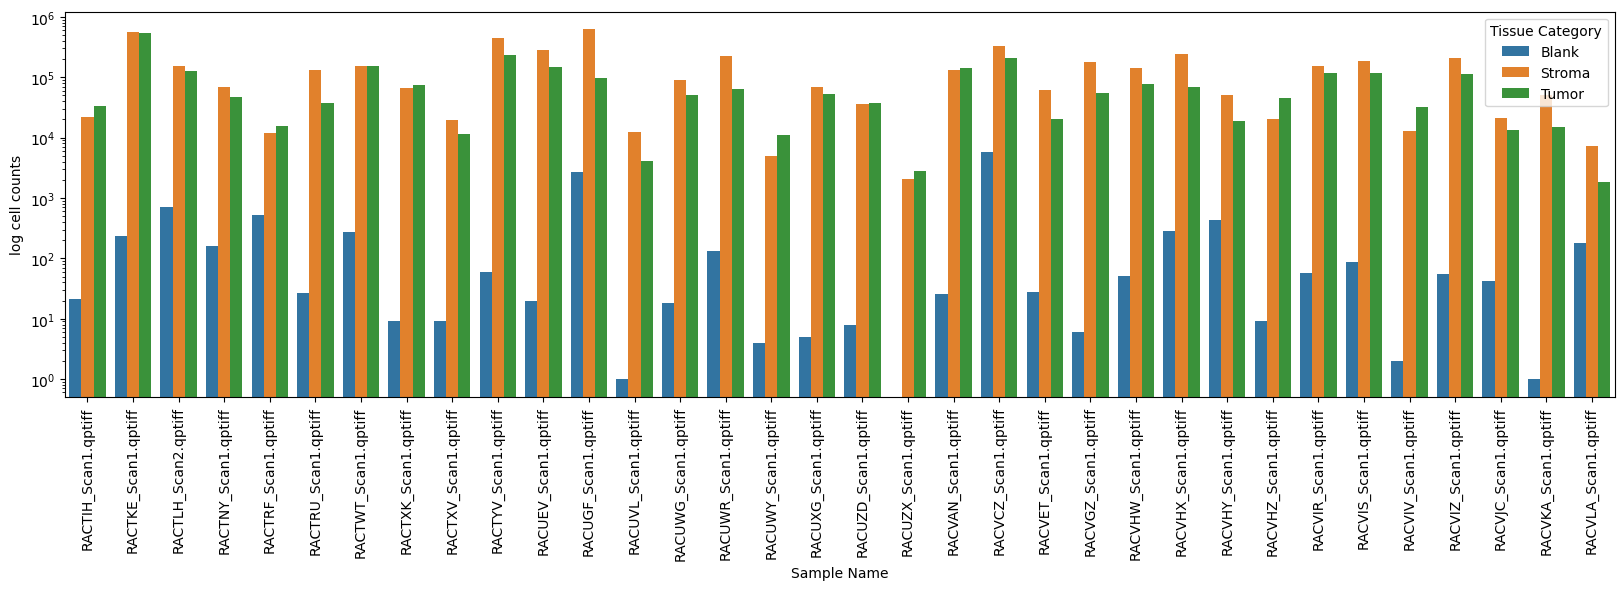

In [8]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
# Determine unique tissue_id values:
sns.barplot( x = 'Sample Name',
            y = 'Cell ID',
             data= tab.sort_values('Sample Name'),
             hue = 'Tissue Category',
             ax=ax)
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')

In [70]:
tab.loc[tab.loc[:,'Tissue Category'].values == 'Blank',:].sort_values('Cell ID',ascending=False)

,Sample Name,Tissue Category,Cell ID
59,RACVCZ_Scan1.qptiff,Blank,5824
33,RACUGF_Scan1.qptiff,Blank,2706
6,RACTLH_Scan2.qptiff,Blank,714
12,RACTRF_Scan1.qptiff,Blank,516
74,RACVHY_Scan1.qptiff,Blank,425
71,RACVHX_Scan1.qptiff,Blank,287
18,RACTWT_Scan1.qptiff,Blank,276
3,RACTKE_Scan1.qptiff,Blank,234
98,RACVLA_Scan1.qptiff,Blank,177
9,RACTNY_Scan1.qptiff,Blank,161


Note: "Blank" is empty slide so cells there are artifactual / should be excluded according to Marion.

In [9]:
df.columns[df.columns.str.contains('Phenotype')]

Index(['Phenotype-CD3', 'Phenotype-PDL1', 'Phenotype-CK', 'Phenotype-CD8',
       'Phenotype-PD1', 'Phenotype-FOXP3'],
      dtype='object')

# Examine PD1 vs. CD3

In [10]:
ids = merge.loc[:,'Sample Name'].unique()
p_frac = []
c3_frac = []
pc3_frac = []
c8_frac = []
pc8_frac = []
ck_frac = []
pck_frac = []
pc3c8_frac = []
pc3_c3frac = []
for i,s in enumerate(tqdm(ids)):
    idx = merge.loc[:,'Sample Name'].values == s
    tot = np.sum(idx)
    pd1 = merge.loc[idx,'Phenotype-PD1'].values == 'PD1+'
    p_frac.append(np.sum(pd1)/tot)
    cd3 = merge.loc[idx,'Phenotype-CD3'].values == 'CD3+'
    c3_frac.append(np.sum(cd3)/tot)
    pd1cd3 =pd1 & cd3
    pc3_frac.append(np.sum(pd1cd3)/tot)
    
    cd8 = merge.loc[idx,'Phenotype-CD8'].values == 'CD8+'
    c8_frac.append(np.sum(cd8)/tot)
    pd1cd8 = cd8 & pd1
    pc8_frac.append(np.sum(pd1cd8)/tot)
    ck = merge.loc[idx,'Phenotype-CK'].values == 'CK+'
    ck_frac.append(np.sum(ck)/tot)
    pck = ck & pd1
    pck_frac.append(np.sum(pck)/tot)
    
    pc3c8_frac.append(np.sum(pd1 & cd3 & cd8)/tot)
    pc3_c3frac.append(np.sum(pd1 & cd3)/np.sum(cd3))
    

100%|██████████| 34/34 [00:06<00:00,  5.21it/s]


No handles with labels found to put in legend.


Text(0, 0.5, 'PD1+CD8+CD3+ sample fraction')

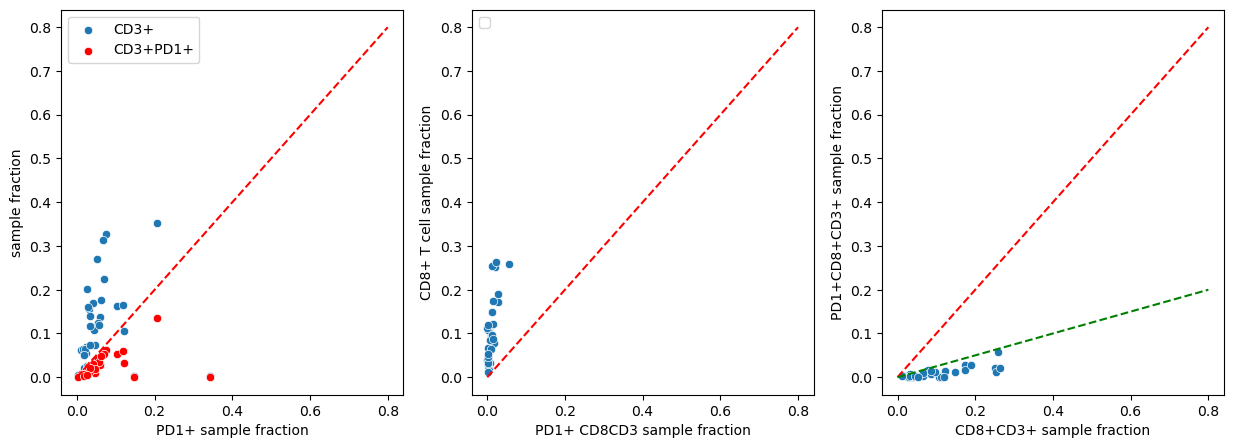

In [11]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(1,3,1)
sns.scatterplot(x=p_frac,y=c3_frac,ax=ax,label='CD3+')
sns.scatterplot(x=p_frac,y=pc3_frac,ax=ax,color='r',label='CD3+PD1+')
plt.legend()
ax.plot([0,0.8],[0,0.8],'--r')
plt.xlabel('PD1+ sample fraction')
plt.ylabel('sample fraction')
    
ax = fig.add_subplot(1,3,2)
sns.scatterplot(x=pc3c8_frac,y=c8_frac,ax=ax)
# sns.scatterplot(x=p_frac,y=pck_frac,ax=ax,color='r')
plt.legend()
ax.plot([0,0.8],[0,0.8],'--r')
plt.xlabel('PD1+ CD8CD3 sample fraction')
plt.ylabel('CD8+ T cell sample fraction')


ax = fig.add_subplot(1,3,3)
# sns.scatterplot(x=c3_frac,y=pc3_c3frac,ax=ax)
sns.scatterplot(x=c8_frac,y=pc3c8_frac,ax=ax)
ax.plot([0,0.8],[0,0.8],'--r')
ax.plot([0,0.8],[0,0.2],'--g') # 20%
plt.xlabel('CD8+CD3+ sample fraction')
plt.ylabel('PD1+CD8+CD3+ sample fraction')

# ax = fig.add_subplot(1,3,3)
# sns.scatterplot(x=c3_frac,y=pc3_c3frac,ax=ax)
# # sns.scatterplot(x=p_frac,y=pc8_frac,ax=ax,color='r')
# ax.plot([0,0.8],[0,0.8],'--r')
# plt.xlabel('CD3+ sample fraction')
# plt.ylabel('PD-1+ CD3+ sample fraction')

# Define cell types

In [26]:
ck = df.loc[:,'Phenotype-CK'].values == 'CK+'
pdl1 =  df.loc[:,'Phenotype-PDL1'].values == 'PDL1+'
print(np.sum(ck & pdl1), np.sum(pdl1 & (~ck)),np.sum(pdl1))
# cd3 =  df.loc[:,'Phenotype-PDDL1'].values == 'PDL1+' 

1429977 814941 2244918


In [48]:
exclusive = False
verbose = True
qc_thresh = 0
pdl1_ck_idx =  vecutils.multi_to_index(df,
                                 multi_label_types , 
                                 'PDL1.panCK',
                                 exclusive=exclusive,
                                 col_types = cell_cols,
                                 qc_thresh= qc_thresh,
                                 verbose = verbose)
print(np.sum(ck ))
pdl1_ckn_idx =  vecutils.multi_to_index(df,
                                 multi_label_types , 
                                 'PDL1.panCK.neg',
                                 exclusive=exclusive,
                                 col_types = cell_cols,
                                 qc_thresh= qc_thresh,
                                 verbose = verbose)
print( np.sum(df.loc[:,'Phenotype-CK'].values != 'CK+'))

#This should be true
(np.sum(pdl1_ck_idx) + np.sum(pdl1_ckn_idx)) == np.sum(pdl1)

Marker combination PDL1.panCK
	PDL1+, n = 2244918
	CK+, n = 2889629
	Intersection, n = 1429977
2889629
Marker combination PDL1.panCK.neg
	PDL1+, n = 2244918
	CK-, n = 4674527
	Intersection, n = 814941
4674527


True

In [45]:
np.sum(pdl1) - np.sum(pdl1_ckn_idx)

0

In [36]:
ck = df.loc[:,'Phenotype-CK'].values == 'CK+'
pdl1 =  df.loc[:,'Phenotype-PDL1'].values == 'PDL1+'
print(np.sum(ck & pdl1), np.sum(pdl1 & (~ck)),np.sum(pdl1))
print(np.sum(pdl1_ck_idx),np.sum(pdl1_ckn_idx))

1429977 814941 2244918
1331829 1852213


In [28]:
(np.sum(ck & pdl1) + np.sum(pdl1 & (~ck))) == np.sum(pdl1)

True

In [6]:
col_types = ['PD1','CD8', 'PDL1', 'CD3', 'CK', 'FOXP3']
cell_labels = ['PD1+','CD8+', 'PDL1+', 'CD3+', 'CK+', 'FOXP3+']

# #T-cell types (ideally also with and without PD-L1, one with CD8+):
multi_label_types = { #PDL1 for stroma/ Panck:                     
                     'PDL1.panCK': {'PDL1+':True,'CK+':True},
                     'PDL1.panCKneg.CD3pos': {'PDL1+':True,'CK+':False,"CD3+":True},
                     'PDL1.panCKneg.CD3neg': {'PDL1+':True, "CK+":False, "CD3+":False},
                     'CD3.CD8.Tcell': {'CD3+':True,  'CD8+':True}, 
                     #Treg
                     'Treg': {'CD3+':True,'CD8+':False,'FOXP3+':True}, #Need to describe?
                    }


# Save table of co-expression cell types only

In [19]:
cell_cols = []
conf_cols = []
df = merge.copy()
for col in col_types:
    cell_cols.append('Phenotype-%s' % col)
    conf_cols.append('Confidence-%s' % col)
    
qc_thresh = 50
verbose = True
print('QC: %d' % qc_thresh)
exclusive= False
coex_df = pd.DataFrame([])
all_use = np.zeros((df.shape[0],)).astype(bool)
for comb_type in tqdm(multi_label_types.keys()):
    idx =  vecutils.multi_to_index(df,
                                 multi_label_types , 
                                 comb_type,
                                 exclusive=exclusive,
                                 col_types = cell_cols,
                                 qc_thresh= qc_thresh,
                                 verbose = verbose)
    all_use = all_use | idx
    df.loc[idx,'coex_cell']=comb_type

other_idx = ~all_use
print('other',np.sum(other_idx))
df.loc[other_idx,'coex_cell'] = 'Other'
coex_fn = results.joinpath('vectra_mergepanel_%d_of_%d_qc%d_cell_seg_coex_5_group.tsv' % \
                           (np.sum(all_use),
                            df.shape[0],
                            qc_thresh))
print(coex_fn)
study_ID=df.loc[:,'Sample Name'].str.split('_').str[0]
df.loc[:,'study_id'] = study_ID
df.to_csv(coex_fn,index=False, sep='\t')
df.groupby(['coex_cell'])['sample_type'].count()

QC: 50


  0%|          | 0/5 [00:00<?, ?it/s]

Marker combination PDL1.panCK
	PDL1+, n = 2244918
	CK+, n = 2889629
	Intersection, n = 1429884


 20%|██        | 1/5 [00:10<00:42, 10.73s/it]

Marker combination PDL1.panCKneg.CD3pos
	PDL1+, n = 2244918
	CK-, n = 4674527


 40%|████      | 2/5 [00:26<00:40, 13.51s/it]

	CD3+, n = 865508
	Intersection, n = 183681
Marker combination PDL1.panCKneg.CD3neg
	PDL1+, n = 2244918
	CK-, n = 4674527


 60%|██████    | 3/5 [00:41<00:29, 14.55s/it]

	CD3-, n = 6698648
	Intersection, n = 631194
Marker combination CD3.CD8.Tcell
	CD3+, n = 865508


 80%|████████  | 4/5 [00:52<00:12, 12.83s/it]

	CD8+, n = 769168
	Intersection, n = 318604
Marker combination Treg
	CD3+, n = 865508
	CD8-, n = 6794988


100%|██████████| 5/5 [01:07<00:00, 13.59s/it]

	FOXP3+, n = 396563
	Intersection, n = 224520
other 4924642


/mnt/results/vectra_mergepanel_2639514_of_7564156_qc50_cell_seg_coex_5_group.tsv


coex_cell
CD3.CD8.Tcell            318604
Other                   4924642
PDL1.panCK              1401631
PDL1.panCKneg.CD3neg     631194
PDL1.panCKneg.CD3pos      63565
Treg                     224520
Name: sample_type, dtype: int64

# Load coexpressing cell data

In [8]:
df = pd.read_csv(results.joinpath('vectra_mergepanel_2639514_of_7564156_qc50_cell_seg_coex_5_group.tsv'),
                                  sep='\t')
print(df.shape)
pt_ID=df.loc[:,'Sample Name'].str.split('_').str[0]
np.unique(pt_ID)

(7564156, 83)


array(['RACTIH', 'RACTKE', 'RACTLH', 'RACTNY', 'RACTRF', 'RACTRU',
       'RACTWT', 'RACTXK', 'RACTXV', 'RACTYV', 'RACUEV', 'RACUGF',
       'RACUVL', 'RACUWG', 'RACUWR', 'RACUWY', 'RACUXG', 'RACUZD',
       'RACUZX', 'RACVAN', 'RACVCZ', 'RACVET', 'RACVGZ', 'RACVHW',
       'RACVHX', 'RACVHY', 'RACVHZ', 'RACVIR', 'RACVIS', 'RACVIV',
       'RACVIZ', 'RACVJC', 'RACVKA', 'RACVLA'], dtype=object)

# Plot N of each coex cell

Text(0, 0.5, 'log cell counts')

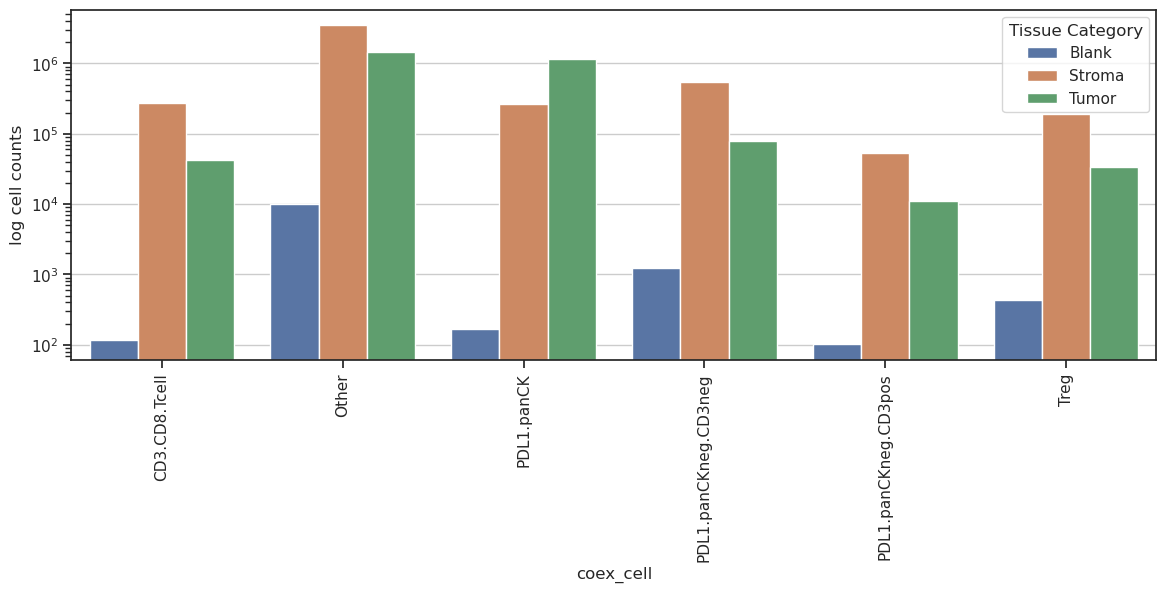

In [10]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(2,1,1)
sns.set_style("darkgrid")
sns.set(style="ticks")
tab = df.groupby(['coex_cell','Tissue Category'])['Cell ID'].count().to_frame().reset_index()
ax = sns.barplot(x = 'coex_cell',
                 y='Cell ID',
             data= tab.sort_values('coex_cell'),
             hue = 'Tissue Category',
             ax=ax)
ax.grid(axis='y')
plt.xticks(rotation = 90);
plt.yscale('log');
plt.ylabel('log cell counts')



# Generate cell density (%)

In [12]:
multi_label_types 

{'PDL1.panCK': {'PDL1+': True, 'CK+': True},
 'PDL1.panCKneg.CD3pos': {'PDL1+': True, 'CK+': False, 'CD3+': True},
 'PDL1.panCKneg.CD3neg': {'PDL1+': True, 'CK+': False, 'CD3+': False},
 'CD3.CD8.Tcell': {'CD3+': True, 'CD8+': True},
 'Treg': {'CD3+': True, 'CD8+': False, 'FOXP3+': True}}

In [16]:
new_multi_label = {}
new_key_base = ['tumor','stroma','all']
for key in multi_label_types.keys():
    val = multi_label_types[key]
    for base in new_key_base:
        new_key = key + '.' + base
        new_multi_label[new_key] = {key:True}
new_multi_label

{'PDL1.panCK.tumor': {'PDL1.panCK': True},
 'PDL1.panCK.stroma': {'PDL1.panCK': True},
 'PDL1.panCK.all': {'PDL1.panCK': True},
 'PDL1.panCKneg.CD3pos.tumor': {'PDL1.panCKneg.CD3pos': True},
 'PDL1.panCKneg.CD3pos.stroma': {'PDL1.panCKneg.CD3pos': True},
 'PDL1.panCKneg.CD3pos.all': {'PDL1.panCKneg.CD3pos': True},
 'PDL1.panCKneg.CD3neg.tumor': {'PDL1.panCKneg.CD3neg': True},
 'PDL1.panCKneg.CD3neg.stroma': {'PDL1.panCKneg.CD3neg': True},
 'PDL1.panCKneg.CD3neg.all': {'PDL1.panCKneg.CD3neg': True},
 'CD3.CD8.Tcell.tumor': {'CD3.CD8.Tcell': True},
 'CD3.CD8.Tcell.stroma': {'CD3.CD8.Tcell': True},
 'CD3.CD8.Tcell.all': {'CD3.CD8.Tcell': True},
 'Treg.tumor': {'Treg': True},
 'Treg.stroma': {'Treg': True},
 'Treg.all': {'Treg': True}}

In [44]:
 f_clin.loc[:,'Tissue Category'].unique()

array(['Stroma', 'Tumor', 'Blank'], dtype=object)

## adapted for inform

In [54]:
idx = df_clin.loc[:,'Tissue Category'].isin(['Tumor','Stroma'])
df.loc[~idx,'Tissue Category'].unique()

array(['Blank'], dtype=object)

In [58]:
df_clin = df
verbose = False
cell_labels = [x for x in new_multi_label.keys()]
fdr_n = len(cell_labels)
pts = df_clin.study_id.unique()
tissues = ['Tumor','Stroma']  

#Create appropriate key:
new_multi_label = {}
new_key_base = ['tumor','stroma','all']
for key in multi_label_types.keys():
    val = multi_label_types[key]
    for base in new_key_base:
        new_key = key + '.' + base
        new_multi_label[new_key] = {key:True}
        
for data_type in ['percent','counts']:
    if data_type == 'counts':
        save_counts = True
    else:
        save_counts = False
    dataset_df = pd.DataFrame([])
    for pt in tqdm(pts):
        idx = (df_clin.study_id.values == pt) \
              & df_clin.loc[:,'Tissue Category'].isin(tissues)
        subset = df_clin.loc[idx,:].copy().reset_index(drop=True)
        samp_df =subset.loc[[0],['Sample Name','study_id']].copy()   
        samp_df.loc[0,'total_roi'] = len(subset.tissue_id.unique())
        temp = subset.groupby(['Tissue Category'])['tissue_id'].unique().apply(len).reset_index()
        for tissue in tissues:
            if tissue in temp.loc[:,'Tissue Category'].values:
                x = temp.loc[temp.loc[:,'Tissue Category'].values == tissue,
                             'tissue_id'].values
            else:
                x = 0
            col = 'n_%s_segments' % tissue.lower()
            samp_df.loc[0,col] = x
        for cell in cell_labels:                      
            tot = subset.shape[0]
            idx = (np.zeros((tot,))+1).astype(bool) # Start true
            for cond in new_multi_label[cell]:     
                use = new_multi_label[cell][cond]
                idx = idx & (subset.coex_cell.str.contains(cond,regex=False) == use)
            if ('tumor' in cell):
                idx2 = subset.loc[:,'Tissue Category'].values == 'Tumor' 
                idx = idx & idx2           
                tot = np.sum(idx2) # All tumor cells
            elif ('stroma' in cell):
                idx2 = subset.loc[:,'Tissue Category'].values == 'Stroma' 
                idx = idx & idx2
                tot = np.sum(idx2) #All stromal cells
            #Else tot remains same (all cells) and percent is total (tumor + stroma)

            counts = np.sum(idx)
            percent = counts / tot * 100
            if verbose:
                print(cell,tot,percent,subset.loc[idx,'coex_cell'].unique(),np.sum(idx))
            if save_counts:
                samp_df.loc[0,'%s_%s' % (cell,data_type)] = counts
                samp_df.loc[0,'%s_%s' % (cell,'denominator')] = tot
            else:
                samp_df.loc[0,'%s_%s' % (cell,data_type)] = percent
        #For each patient:
        dataset_df = pd.concat((dataset_df,samp_df),axis=0)
    dataset_df = dataset_df.sort_values('study_id').reset_index(drop=True)   
    fn = 'cell_density_%d_all_inc_tumor_stroma_%dcol_%s_v1.csv' % (dataset_df.shape[0],
                                                                dataset_df.shape[1],
                                                                data_type)
    pnfn = results.joinpath(fn)
    print(pnfn)
    dataset_df.to_csv(pnfn,index=False)
    

100%|██████████| 34/34 [01:05<00:00,  1.92s/it]


/mnt/results/cell_density_34_all_inc_tumor_stroma_20_percent_v1.csv


100%|██████████| 34/34 [01:05<00:00,  1.92s/it]

/mnt/results/cell_density_34_all_inc_tumor_stroma_35_counts_v1.csv


In [59]:
dataset_df.tail()

,Sample Name,study_id,total_roi,n_tumor_segments,n_stroma_segments,PDL1.panCK.tumor_counts,PDL1.panCK.tumor_denominator,PDL1.panCK.stroma_counts,PDL1.panCK.stroma_denominator,PDL1.panCK.all_counts,...,CD3.CD8.Tcell.stroma_counts,CD3.CD8.Tcell.stroma_denominator,CD3.CD8.Tcell.all_counts,CD3.CD8.Tcell.all_denominator,Treg.tumor_counts,Treg.tumor_denominator,Treg.stroma_counts,Treg.stroma_denominator,Treg.all_counts,Treg.all_denominator
29,RACVIV_Scan1.qptiff,RACVIV,20.0,20.0,20.0,12964.0,31778.0,4766.0,12674.0,17730.0,...,667.0,12674.0,1142.0,44452.0,579.0,31778.0,1030.0,12674.0,1609.0,44452.0
30,RACVIZ_Scan1.qptiff,RACVIZ,92.0,92.0,92.0,28034.0,112367.0,26209.0,211189.0,54243.0,...,17430.0,211189.0,19802.0,323556.0,4055.0,112367.0,18410.0,211189.0,22465.0,323556.0
31,RACVJC_Scan1.qptiff,RACVJC,13.0,13.0,13.0,731.0,13340.0,789.0,20696.0,1520.0,...,192.0,20696.0,226.0,34036.0,111.0,13340.0,226.0,20696.0,337.0,34036.0
32,RACVKA_Scan1.qptiff,RACVKA,16.0,16.0,16.0,5443.0,15192.0,6818.0,50543.0,12261.0,...,6012.0,50543.0,6966.0,65735.0,881.0,15192.0,3932.0,50543.0,4813.0,65735.0
33,RACVLA_Scan1.qptiff,RACVLA,2.0,2.0,2.0,9.0,1804.0,530.0,7203.0,539.0,...,7.0,7203.0,7.0,9007.0,0.0,1804.0,0.0,7203.0,0.0,9007.0
